## Collecting images

In [61]:
def screen_capture():
    import pyscreenshot as ImageGrab
    import time

    images_folder = "captured_images/9/"

    for i in range(1,101):
        time.sleep(8)
        im = ImageGrab.grab(bbox = (170,320,670,810))
        print("Saved...",i)
        im.save(images_folder+str(i)+".png")
        print("Clear screen and redraw...")

In [ ]:
screen_capture()

In [50]:
#pyscreenshot,opencv-python,pandas,scikit-learn

# Generate dataset

In [67]:
import cv2
import csv
import glob

In [68]:
header = ["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open("dataset.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow(header)

In [69]:
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")

    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi = cv2.resize(im_gray, (28,28), interpolation = cv2.INTER_AREA)
    
        data = []
        data.append(label)
        rows, cols = roi.shape

        ##Add pixel one by one into data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k) 
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# Load the dataset

In [70]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
795,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
543,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# matplotlib, joblib,numpy

# Separation of dependent and independent variable

In [72]:
X = data.drop(['label'],axis=1) # axis = 0 means separated vertically
Y = data["label"]

# Preview of one image using matplotlib

0


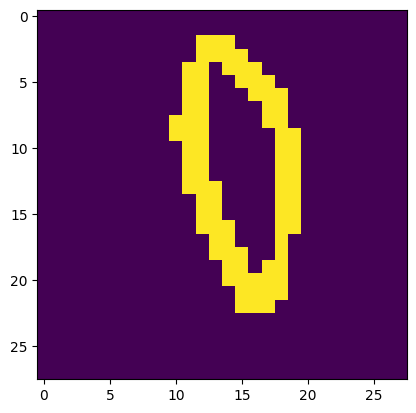

In [124]:
import matplotlib.pyplot as plt
import cv2
idx = 99
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-test split

In [125]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)# 0.2 means 20% of images are used for testing purpose and 80 for training


# Fit the model using svc and also to save the model using joblib

In [126]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state=6) #svc documentation
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

# Calculate accuracy

In [127]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.595


# Prediction of image drawn in paint

In [138]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab
import warnings

model = joblib.load("model/digit_recognizer")
images_folder="img/"

while True:
    img = ImageGrab.grab(bbox= (170,320,670,810))

    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray =cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)

    #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation = cv2.INTER_AREA)

    rows,cols = roi.shape

    X = []

    # Add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)

    predictions = model.predict([X])
    print("Prediction:", predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8, (0,255,0),2,cv2.LINE_AA)

    warnings.filterwarnings("ignore", category=UserWarning)

    svc = SVC()
    svc.fit(train_x, train_y)
    
    # Ignore the warning.
    y_pred = svc.predict(test_x)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13:# 27 is the ASCII value of esc, 13 is the ASCII value of enter 
        break
cv2.destroyAllWindows()



Prediction: 4
Prediction: 6
Prediction: 9
Prediction: 8
Prediction: 3
Prediction: 1
Prediction: 0
Prediction: 2


KeyboardInterrupt: 